# usando knn

Acurácia do modelo: 94.87%

Matriz de confusão:
[[ 5  2]
 [ 0 32]]


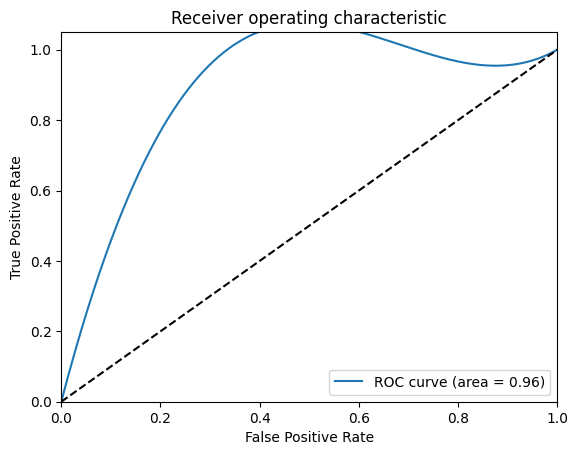

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, BSpline
from scipy import interpolate

# Carregando o dataset Parkinson's
data = pd.read_csv('parkinsons.data')

# Separa as features dos labels
X = data.drop(['name','status'], axis=1)
y = data['status']

# Divide em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplica o escalonamento nas features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Treina o modelo KNN
knn = KNeighborsClassifier(n_neighbors=7,metric='manhattan')
knn.fit(X_train_scaled, y_train)

# Faz a predição no conjunto de teste
y_pred = knn.predict(X_test_scaled)

# Calcula e imprime a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia do modelo: {:.2f}%'.format(accuracy*100))

# Calcula e imprime a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de confusão:')
print(cm)

# Calcula e plota a curva ROC
y_pred_prob = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Interpolando valores para suavizar a curva ROC
n_interp_points = 300
fpr_unique, indices = np.unique(fpr, return_index=True)
tpr_unique = tpr[indices]
spline = make_interp_spline(fpr_unique, tpr_unique, k=3)
fpr_interp = np.linspace(fpr_unique.min(), 1, n_interp_points)
tpr_interp = spline(fpr_interp)

# Plotando a curva ROC suavizada
plt.plot(fpr_interp, tpr_interp, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [15]:
from tabulate import tabulate
from sklearn.metrics import confusion_matrix

# Obtendo a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Obtendo os valores de VP, FP, FN e VN
vp = cm[1, 1]
fp = cm[0, 1]
fn = cm[1, 0]
vn = cm[0, 0]

# Criando a tabela LaTeX
headers = ['', 'Previsto 1', 'Previsto 0']
table = [['Real 1', vp, fn],
         ['Real 0', fp, vn]]
print(tabulate(table, headers, tablefmt='latex_booktabs'))

\begin{tabular}{lrr}
\toprule
        &   Previsto 1 &   Previsto 0 \\
\midrule
 Real 1 &           30 &            2 \\
 Real 0 &            1 &            6 \\
\bottomrule
\end{tabular}


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculando as previsões no conjunto de teste
y_pred = knn.predict(X_test)
# Realizando previsões no conjunto de teste
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Calculando as métricas de avaliação da classificação no conjunto de teste
metrics = {
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1_score': [f1_score(y_test, y_pred)],
    'roc_auc_score': [roc_auc_score(y_test, y_pred_prob)]
}


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [16]:
from tabulate import tabulate

# Criando a tabela latex
headers = ['Metrica', 'Valor']
table = []
for key in metrics.keys():
    row = [key, '']
    for i in range(len(metrics[key])):
        row.append(round(metrics[key][i], 3))
    table.append(row)

print(tabulate(table, headers=headers, tablefmt="latex_booktabs"))

\begin{tabular}{llr}
\toprule
               & Metrica   &   Valor \\
\midrule
 accuracy      &           &   0.308 \\
 precision     &           &   1     \\
 recall        &           &   0.156 \\
 f1\_score      &           &   0.27  \\
 roc\_auc\_score &           &   0.578 \\
\bottomrule
\end{tabular}


In [17]:
from sklearn.model_selection import GridSearchCV

# Definindo os valores possíveis para o parâmetro "n_neighbors"
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Criando um modelo KNN
knn = KNeighborsClassifier()

# Realizando uma busca em grade para encontrar o valor ideal de "n_neighbors"
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Selecionando o melhor modelo encontrado pela busca em grade
best_knn = grid_search.best_estimator_

# Avaliando o modelo usando os dados de teste
y_pred = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_knn.predict_proba(X_test_scaled)[:, 1])

# Imprimindo as métricas de avaliação
print('Accuracy: %.3f' % accuracy)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1-score: %.3f' % f1)
print('ROC AUC score: %.3f' % roc_auc)
print('Melhor valor de n_neighbors: %d' % grid_search.best_params_['n_neighbors'])


Accuracy: 0.923
Precision: 0.968
Recall: 0.938
F1-score: 0.952
ROC AUC score: 0.980
Melhor valor de n_neighbors: 3


# USANDO O PCA

Métricas de avaliação:
accuracy: 0.831
precision: 0.854
recall: 0.932
f1_score: 0.891
roc_auc_score: 0.905

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.85      0.93      0.89        44

    accuracy                           0.83        59
   macro avg       0.79      0.73      0.75        59
weighted avg       0.82      0.83      0.82        59



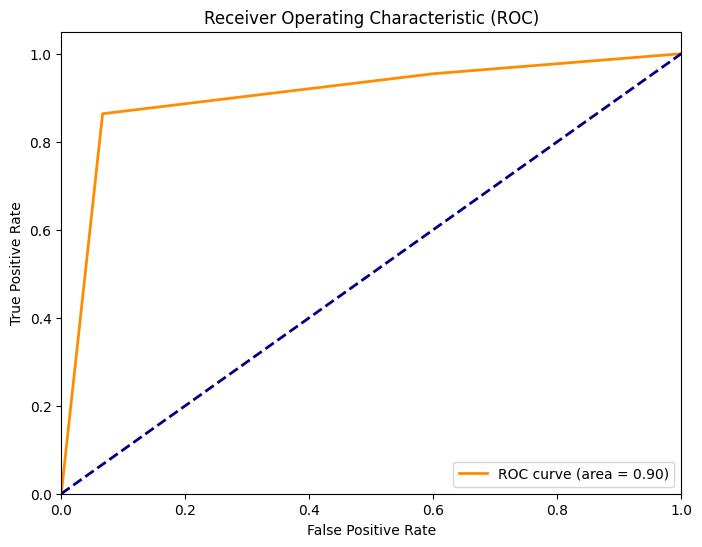

In [39]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Carregando o dataset Parkinson's
df = pd.read_csv('parkinsons.data')

# Separando os dados em X e y
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Aplicando o PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Aplicando o pré-processamento dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajustando o modelo KNN com métrica de distância de Manhattan
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train_scaled, y_train)

# Realizando previsões no conjunto de teste
y_pred = knn.predict(X_test_scaled)
y_pred_prob = knn.predict_proba(X_test_scaled)[:, 1]

# Calculando as métricas de avaliação da classificação no conjunto de teste
metrics = {
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1_score': [f1_score(y_test, y_pred)],
    'roc_auc_score': [roc_auc_score(y_test, y_pred_prob)]
}

# Imprimindo as métricas
print('Métricas de avaliação:')
for key, value in metrics.items():
    print(f'{key}: {value[0]:.3f}')

# Imprimindo o relatório de classificação
print('\nRelatório de classificação:')
print(classification_report(y_test, y_pred))

# Calculando e plotando o gráfico ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


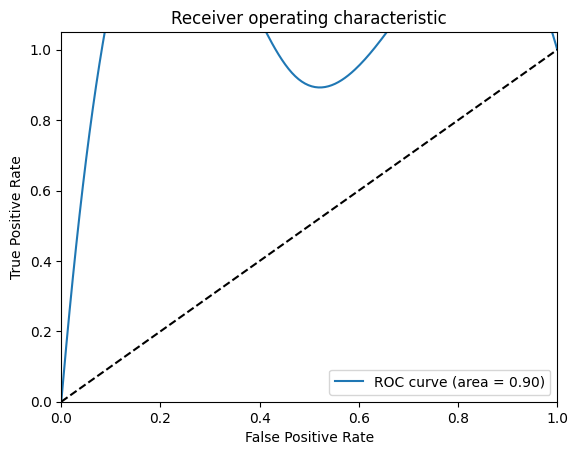

In [35]:
# Interpolando valores para suavizar a curva ROC
n_interp_points = 300
fpr_unique, indices = np.unique(fpr, return_index=True)
tpr_unique = tpr[indices]
spline = make_interp_spline(fpr_unique, tpr_unique, k=3)
fpr_interp = np.linspace(fpr_unique.min(), 1, n_interp_points)
tpr_interp = spline(fpr_interp)

# Plotando a curva ROC suavizada
plt.plot(fpr_interp, tpr_interp, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
